In [3]:
import numpy as np#
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict
from tqdm import tqdm 
cmaps = OrderedDict()
cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

In [5]:
amps = np.arange(0.01,1.5,.01)
tot_L = 10
ells = range(1,tot_L)
ps = np.zeros((tot_L, len(amps)))
for indL in tqdm(ells):
    for inda, a in enumerate(amps):
        #ps[indL, inda] = np.load("/data/uab-giq/scratch/matias/dynamo/{}/{}/Ps.npy".format(indL,np.round(a,3)))[0, 100]
        ps[indL, inda] = np.load("/data/uab-giq/scratch/matias/2021/BPSK_dolinar/{}/{}/Ps.npy".format(indL,np.round(a,3)))[0,100]


100%|██████████| 9/9 [00:01<00:00,  6.41it/s]


In [7]:
#tot_L = 10
#ells = range(1,tot_L)
pss = np.zeros((3, len(amps)))
for ii,indL in enumerate([10,20,30]):
    for inda, a in enumerate(amps):
        try:
            pss[ii, inda] = np.load("/data/uab-giq/scratch/matias/2021/BPSK_dolinar/{}/{}/Ps.npy".format(indL,np.round(a,3)))[0,100]
        except Exception:
            pss[ii, inda] = pss[ii, inda-1]
                

In [8]:
def hel(alpha):
    return (1+np.sqrt(1-np.exp(-4*alpha**2)))/2

In [17]:
import os
os.makedirs("data_dp",exist_ok=True)

In [15]:
np.save("data_dp/ps"

(10, 149)

In [18]:
ps.sha

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.91422933e-01, 4.82849296e-01, 4.74282517e-01, ...,
        8.79917598e-05, 7.82096950e-05, 6.94585607e-05],
       [4.90976765e-01, 4.81699837e-01, 4.72560039e-01, ...,
        8.37565168e-05, 7.46708606e-05, 6.65072166e-05],
       ...,
       [4.90539582e-01, 4.80621115e-01, 4.70946251e-01, ...,
        5.50162708e-05, 4.91074450e-05, 4.38167622e-05],
       [4.90513228e-01, 4.80550149e-01, 4.70848149e-01, ...,
        5.13642438e-05, 4.57602765e-05, 4.07434901e-05],
       [4.90491777e-01, 4.80492099e-01, 4.70769031e-01, ...,
        4.82111970e-05, 4.29036086e-05, 3.81588869e-05]])

Text(0.5, 1.0, 'Dolinar-like receiver for BPSK quantum discrimination of coherent states')

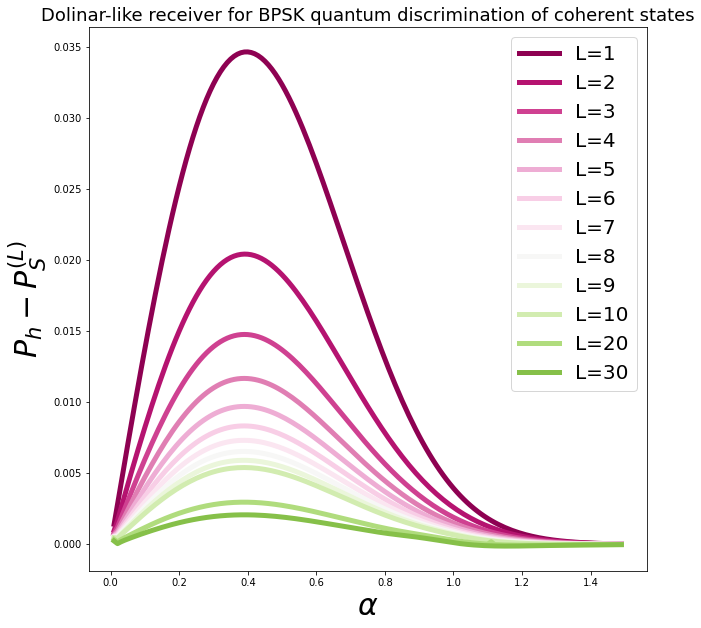

In [13]:
name = "PiYG"
cc=cm.get_cmap(name)
plt.figure(figsize=(10,10))
ax1 = plt.subplot(111)
lw=5
colors = {0:"red",1:"blue",2:"pink",3:"black"}
ind=0
tot=14
for layer in range(1,10):
    ax1.plot(amps,hel(amps) - 1 + ps[layer], label="L="+str(layer), linewidth=lw, color=cc(ind/tot))# color=colors[layer])
    ind+=1
for indl, lay in enumerate([10,20,30]):
    ax1.plot(amps, hel(amps)-1+pss[indl], label="L="+str(lay),linewidth=lw, color=cc(ind/tot))
    ind+=1
#plt.plot(amps,1-hel(amps),'--')
ax1.legend(prop={"size":20})
ax1.set_xlabel(r'$\alpha$',size=30)
ax1.set_ylabel(r'$P_h - P_S^{(L)}$',size=30)
ax1.set_title("Dolinar-like receiver for BPSK quantum discrimination of coherent states",size=18)

#plt.savefig("figures_readme/bpsk_noiseless.png")